# MARKETING A/B TESTING 
Marketing companies want to run successful campaigns, but the market is complex and several options can work, hence, A/B testing is handing in determining the most rewarding option. A/B testing is a randomized experimentation process wherein two versions of a treatment (web page, wordingd of headlines, price of products, design of button, web interface design, banner, etc.) are randomly applied to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics. in conducting A/B tests, companies are interested in answering two questions:
 - Would the campaign be successful?
 - If the campaign was successful, how much of that success could be attributed to the treatment being examined?
With the second question in mind, we normally do an A/B test. In this project, I shall carry out A/B testing to determine if advertisement perform better than public service announcement in maximizing conversion rate 

### Dataset
The dataset for this project was generated from A/B testing designed to ads perform better than public service announcement (PSA). Here, more people were exposed to the treatment (ads) while fewer people were exposed to the control (PSA). The majority of the people will be exposed to ads (the experimental group). As rule of thumb, the sample size of over 500k is considered sufficient to detect small effect sizes. The dataset was downloaded from https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing. The idea of the dataset is to analyze the groups, find if the ads were successful, how much more money is the company expected to make from the ads.
  - Data dictionary:
  - Index: Row index
  - user id: User ID (unique)
  - test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
  - converted: If a person bought the product then True, else is False
  - total ads: Amount of ads seen by person
  - most ads day: Day that the person saw the biggest amount of ads
  - most ads hour: Hour of day that the person saw the biggest amount of ads
Only the test group and converted columns will be used in this test to determine if there is interaction between ad and psa

In [49]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import scipy.stats as st
import seaborn as sns
df = pd.read_csv('marketing_AB.csv')

In [50]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


##### The Null Hypothesis of no association between test grooup and converted (that is, ads or psa have no impact on conversion rate) will be rejected is the p - value for the test is less that alph value of 0.05. alpha is a pre-determined probability of the difference in conversion rate being attributed to random chance while p - value is alpha value calculated from available sample.

<AxesSubplot: xlabel='converted', ylabel='count'>

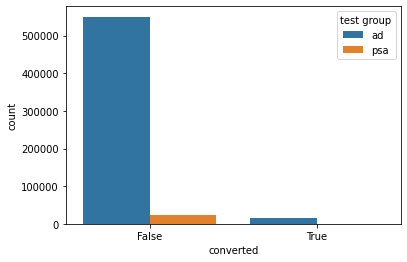

In [51]:
#count plot for conversion rate across the 2 treatments
sns.countplot(x = 'converted', hue = 'test group', data = df)

In [52]:
#I amend the column name to enable crosstabulation
df = df[['test group','converted']]
df.columns = ['test_group','converted']

In [53]:
df

,test_group,converted
0,ad,False
1,ad,False
2,ad,False
3,ad,False
4,ad,False
...,...,...
588096,ad,False
588097,ad,False
588098,ad,False
588099,ad,False


In [54]:
#cross tabulation for chi2 test
print(pd.crosstab(df.test_group,df.converted))

converted    False   True
test_group               
ad          550154  14423
psa          23104    420


In [55]:
ab_contingency = pd.crosstab(df.test_group,df.converted)

In [56]:
chi2, pval, dof, expected = st.chi2_contingency(ab_contingency)
print(pval)

1.9989623063390075e-13


p-value of 0.00000000000013 < alpha hence we reject the null hypothesis of no interaction and conclude that the ads
generated much more conversions than the public service announcement. Conversion rate for ads is 2.55 while conversion rate
for public service announcement is 1.79 hence the difference in conversion rate which is 0.76% is significant